# Assignment 4

Name        : Chia Sin Liew   
Last edited : May 4th, 2022 

The goal of this assignment is to solve regression and classification problems using following models.

- **Part A**: Extensive Study of the MLP Model
- **Part B**: Design an MLP for Optimal Performance

## Part A: Extensive Study of the MLP Model

You will create Multi-Layer Perceptron (MLP) neural network models based on the specification. The MLP model will be trained using the Backpropagation algorithm that is implemented using the mini-batch Stochastic Gradient Descent (SGD) optimization algorithm.

**Mini-batch Size & Training:**
The size of mini-batches should be set to 64. A network should be trained for 50 epochs with *early stopping* on.

### **Dataset**:
You will use the MNIST (Modified National Institute of Standards and Technology) dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents.

There are 70,000 images. Each image is grayscale 28 x 28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black). The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

You may directly load this dataset using the Keras API:
https://keras.io/api/datasets/mnist/

The train set contains 60,000 images, from which you should randomly select 5000 images as the validation set.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import tensorflow as tf

### **Experiments:**
You will perform multi-class classification on the MNIST dataset using the following 10 models. After loading the dataset, create a separate validation subset with 5000 samples. Then, scale the data.

Create the models based on the architecture, SGD learning rate and layer configurations given below.

| Architecture|  | SGD Learning Rate |
| ------------|- | ----------------- |
| Experiment 1 to 7 | 2 hidden layers| 0.1 |
| | Hidden layer 1: neurons=300 | |
| | Hidden layer 2: neurons=100 | |
| Experiment 8 | 2 hidden layers| 0.5 |
| | Hidden layer 1: neurons=300 | |
| | Hidden layer 2: neurons=100 | |
| Experiment 9 | 10 hidden layers each with 100 neurons | 0.1 |
| Experiment 10 | 20 hidden layers each with 100 neurons | 0.1 |

#### Load and scale data

In [3]:
# Load the full training & test data
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


# Create a validation subset as well as scale (max-min scaling) the data
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

print("No. of Training Samples: ", X_train.shape)
print("No. of Training Labels: ", y_train.shape)

print("\nNo. of Validation Samples: ", X_valid.shape)
print("No. of Validation Labels: ", y_valid.shape)

print("\nNo. of Testing Samples: ", X_test.shape)
print("No. of Testing Labels: ", y_test.shape)

print("\nX type: ", X_train.dtype)
print("y type: ", y_train.dtype)

No. of Training Samples:  (55000, 28, 28)
No. of Training Labels:  (55000,)

No. of Validation Samples:  (5000, 28, 28)
No. of Validation Labels:  (5000,)

No. of Testing Samples:  (10000, 28, 28)
No. of Testing Labels:  (10000,)

X type:  float64
y type:  uint8


#### **Experiment 1:**

##### Build the MLP Model

In [10]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Set the values for weight initializer and activation function
'''
kernel_initializer = 'zeros'
activation = 'sigmoid'
number_of_classes = 10


'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
- Apply Dropout regularization
'''
model = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
# model.add(tf.keras.layers.Dropout(rate=0.1)) # add if needed
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
# model.add(tf.keras.layers.Dropout(rate=0.1)) # add if needed
model.add(tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
                             activation="softmax"))

model.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
CPU times: user 35.1 ms, sys: 7.62 ms, total: 42.7 ms
Wall time: 36.9 ms


##### Train the MLP Model

In [11]:
%%time

'''
Define the optimizer
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)


'''
Compile the model
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Create the early stopping callback function.
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

'''
Set the epochs and mini batch size
'''
no_of_epochs = 50
size_of_mini_batch = 64


'''
Train the model
'''
history = model.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/50
860/860 [==============================] - 4s 5ms/step - loss: 2.3105 - accuracy: 0.1006 - val_loss: 2.3120 - val_accuracy: 0.1126
Epoch 2/50
860/860 [==============================] - 4s 4ms/step - loss: 2.3049 - accuracy: 0.1094 - val_loss: 2.3028 - val_accuracy: 0.0958
Epoch 3/50
860/860 [==============================] - 4s 5ms/step - loss: 2.3035 - accuracy: 0.1106 - val_loss: 2.3007 - val_accuracy: 0.1126
Epoch 4/50
860/860 [==============================] - 4s 5ms/step - loss: 2.2932 - accuracy: 0.1191 - val_loss: 2.2273 - val_accuracy: 0.1898
Epoch 5/50
860/860 [==============================] - 4s 4ms/step - loss: 2.1628 - accuracy: 0.2236 - val_loss: 1.9880 - val_accuracy: 0.2690
Epoch 6/50
860/860 [==============================] - 4s 4ms/step - loss: 1.9538 - accuracy: 0.2789 - val_loss: 1.8784 - val_accuracy: 0.3018
Epoch 7/50
860/860 [==============================] - 4s 5ms/step - loss: 1.8569 - accuracy: 0.3032 - val_loss: 1.7947 - val_accuracy: 0.3168
Epoch 

##### History object

In [12]:
print("Training Parameters: ", history.params)
print("\nList of Epochs: ", history.epoch)
print("\nEvaluation Metrics: ", history.history.keys())

Training Parameters:  {'verbose': 1, 'epochs': 50, 'steps': 860}

List of Epochs:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]

Evaluation Metrics:  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##### Model evaluation

In [13]:
numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test, y_test, verbose=0))

# model.predict() method returns 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted = model.predict(X_test)
y_test_predicted = np.argmax(y_test_predicted, axis=1) # get the label/index of the highest probability class


y_train_predicted = model.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis=1) # get the label/index of the highest probability class

train_accuracy = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", train_accuracy)

test_accuracy = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", test_accuracy)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

Epochs:  50

Test Data: Loss & Accuracy:  [1.3834935426712036, 0.4634000062942505]

Train Accuracy:  0.4686727272727273

Test Accuracy:  0.4634

Test Confusion Matrix:
[[919   0   4   2   1   0  54   0   0   0]
 [  0 968   4   4  17   2   2 130   0   8]
 [ 10   1 243 102  61  86 404  22  92  11]
 [  3   5 136 268 192  88  64  73 145  36]
 [  0  15  31 136 354  16  15 238  41 136]
 [  8   2 249 142  60  96 161  11 152  11]
 [ 47   0  89  10   5  12 777   2  15   1]
 [  0 144   6  25  58   3   1 747   7  37]
 [  5   6 147 277 138  86 115  47 134  19]
 [  1  26   9  41 183   1   9 602   9 128]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       980
           1       0.83      0.85      0.84      1135
           2       0.26      0.24      0.25      1032
           3       0.27      0.27      0.27      1010
           4       0.33      0.36      0.35       982
           5       0.25      0.11      0.15       89

##### Plot Learning Curves

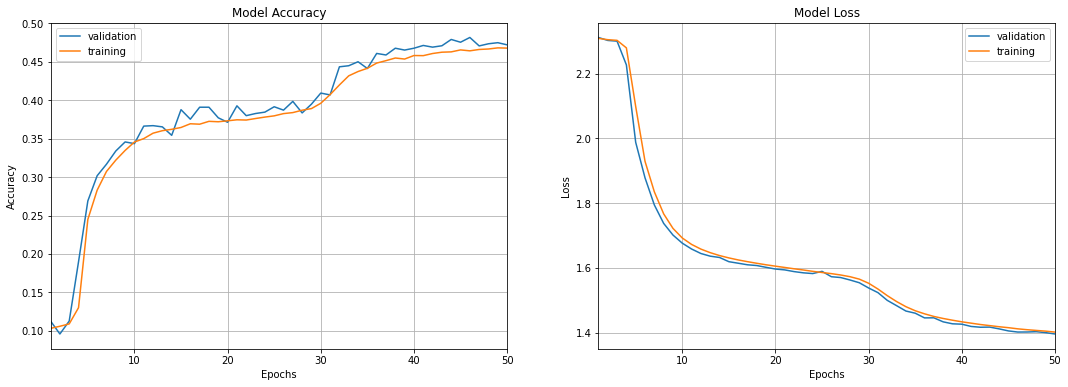

In [14]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show() 

#### Experiment 2

##### Build the MLP Model

In [15]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Set the values for weight initializer and activation function
'''
kernel_initializer = 'ones'
activation = 'sigmoid'
number_of_classes = 10


'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
- Apply Dropout regularization
'''
model = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
# model.add(tf.keras.layers.Dropout(rate=0.1)) # add if needed
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
# model.add(tf.keras.layers.Dropout(rate=0.1)) # add if needed
model.add(tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
                             activation="softmax"))

model.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
CPU times: user 33.1 ms, sys: 3.89 ms, total: 37 ms
Wall time: 34.3 ms


##### Train the MLP Model

In [16]:
%%time

'''
Define the optimizer
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)


'''
Compile the model
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Create the early stopping callback function.
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

'''
Set the epochs and mini batch size
'''
no_of_epochs = 50
size_of_mini_batch = 64


'''
Train the model
'''
history = model.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/50
860/860 [==============================] - 4s 5ms/step - loss: 2.3827 - accuracy: 0.1022 - val_loss: 2.5068 - val_accuracy: 0.1126
Epoch 2/50
860/860 [==============================] - 4s 4ms/step - loss: 2.3749 - accuracy: 0.1003 - val_loss: 2.4203 - val_accuracy: 0.1070
Epoch 3/50
860/860 [==============================] - 4s 5ms/step - loss: 2.3824 - accuracy: 0.1021 - val_loss: 2.5249 - val_accuracy: 0.1002
Epoch 4/50
860/860 [==============================] - 4s 5ms/step - loss: 2.3806 - accuracy: 0.1013 - val_loss: 2.5012 - val_accuracy: 0.0990
Epoch 5/50
860/860 [==============================] - 4s 5ms/step - loss: 2.3838 - accuracy: 0.0986 - val_loss: 2.5983 - val_accuracy: 0.0924
Epoch 6/50
860/860 [==============================] - 4s 4ms/step - loss: 2.3842 - accuracy: 0.1002 - val_loss: 2.5453 - val_accuracy: 0.0986
Epoch 7/50
860/860 [==============================] - 4s 5ms/step - loss: 2.3803 - accuracy: 0.1027 - val_loss: 2.6859 - val_accuracy: 0.1100
Epoch 

##### History object

In [6]:
print("Training Parameters: ", history.params)
print("\nList of Epochs: ", history.epoch)
print("\nEvaluation Metrics: ", history.history.keys())

Training Parameters:  {'verbose': 1, 'epochs': 50, 'steps': 860}

List of Epochs:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]

Evaluation Metrics:  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##### Model evaluation

In [7]:
numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test, y_test, verbose=0))

# model.predict() method returns 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted = model.predict(X_test)
y_test_predicted = np.argmax(y_test_predicted, axis=1) # get the label/index of the highest probability class


y_train_predicted = model.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis=1) # get the label/index of the highest probability class

train_accuracy = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", train_accuracy)

test_accuracy = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", test_accuracy)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

Epochs:  50

Test Data: Loss & Accuracy:  [0.13303634524345398, 0.9598000049591064]

Train Accuracy:  0.9629818181818182

Test Accuracy:  0.9598

Test Confusion Matrix:
[[ 966    0    1    3    0    3    4    2    0    1]
 [   0 1120    3    2    0    2    3    2    3    0]
 [   7    1  987    5    4    1    9   10    8    0]
 [   1    1   10  977    0    6    0    6    9    0]
 [   1    1    4    0  938    1    7    2    2   26]
 [   9    3    0   16    3  827   14    3   12    5]
 [   9    3    3    1    3    8  926    0    5    0]
 [   2    5   16    2    5    0    0  981    1   16]
 [   5    2    3   12    4   12    6    4  922    4]
 [   7    5    1    6   17    7    1    9    2  954]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.96      0.96      1032
           3       0.95      0.97      0.96      1010
     

##### Plot Learning Curves

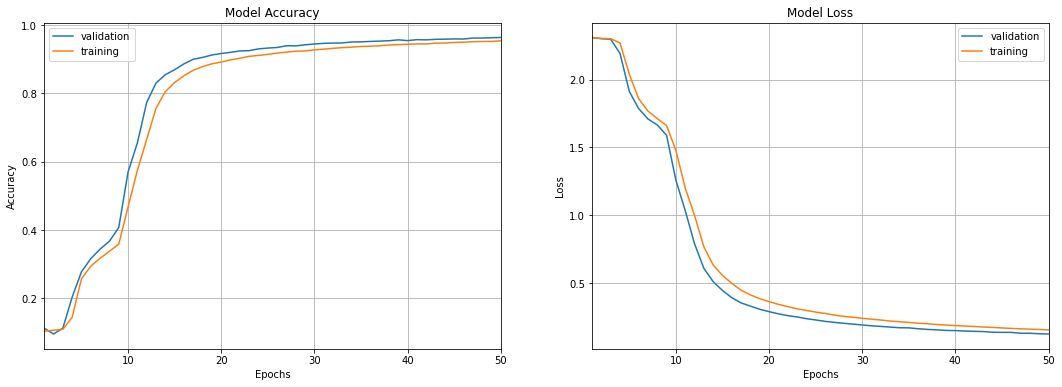

In [8]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show() 

#### Experiment 3

##### Build the MLP Model

In [17]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Set the values for weight initializer and activation function
'''
kernel_initializer = 'random_normal'
activation = 'sigmoid'
number_of_classes = 10


'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
- Apply Dropout regularization
'''
model = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
# model.add(tf.keras.layers.Dropout(rate=0.1)) # add if needed
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
# model.add(tf.keras.layers.Dropout(rate=0.1)) # add if needed
model.add(tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
                             activation="softmax"))

model.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
CPU times: user 42.6 ms, sys: 40.5 ms, total: 83.2 ms
Wall time: 167 ms


##### Train the MLP Model

In [18]:
%%time

'''
Define the optimizer
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)


'''
Compile the model
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Create the early stopping callback function.
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

'''
Set the epochs and mini batch size
'''
no_of_epochs = 50
size_of_mini_batch = 64


'''
Train the model
'''
history = model.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/50
860/860 [==============================] - 5s 5ms/step - loss: 2.1119 - accuracy: 0.2591 - val_loss: 0.8378 - val_accuracy: 0.7512
Epoch 2/50
860/860 [==============================] - 4s 4ms/step - loss: 0.7115 - accuracy: 0.7970 - val_loss: 0.4401 - val_accuracy: 0.8812
Epoch 3/50
860/860 [==============================] - 4s 4ms/step - loss: 0.4383 - accuracy: 0.8760 - val_loss: 0.3549 - val_accuracy: 0.8994
Epoch 4/50
860/860 [==============================] - 4s 5ms/step - loss: 0.3631 - accuracy: 0.8965 - val_loss: 0.3192 - val_accuracy: 0.9090
Epoch 5/50
860/860 [==============================] - 4s 4ms/step - loss: 0.3331 - accuracy: 0.9037 - val_loss: 0.2967 - val_accuracy: 0.9154
Epoch 6/50
860/860 [==============================] - 4s 4ms/step - loss: 0.3123 - accuracy: 0.9089 - val_loss: 0.2846 - val_accuracy: 0.9196
Epoch 7/50
860/860 [==============================] - 4s 5ms/step - loss: 0.2912 - accuracy: 0.9170 - val_loss: 0.2601 - val_accuracy: 0.9240
Epoch 

##### History object

In [19]:
print("Training Parameters: ", history.params)
print("\nList of Epochs: ", history.epoch)
print("\nEvaluation Metrics: ", history.history.keys())

Training Parameters:  {'verbose': 1, 'epochs': 50, 'steps': 860}

List of Epochs:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]

Evaluation Metrics:  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##### Model evaluation

In [20]:
numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test, y_test, verbose=0))

# model.predict() method returns 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted = model.predict(X_test)
y_test_predicted = np.argmax(y_test_predicted, axis=1) # get the label/index of the highest probability class


y_train_predicted = model.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis=1) # get the label/index of the highest probability class

train_accuracy = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", train_accuracy)

test_accuracy = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", test_accuracy)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

Epochs:  50

Test Data: Loss & Accuracy:  [0.08313347399234772, 0.9745000004768372]

Train Accuracy:  0.9854181818181819

Test Accuracy:  0.9745

Test Confusion Matrix:
[[ 962    0    2    2    1    4    4    3    1    1]
 [   0 1125    2    1    0    1    2    2    2    0]
 [   1    2 1007    7    2    0    2    8    3    0]
 [   0    0    4  994    0    2    0    7    2    1]
 [   0    0    2    0  957    1    5    2    0   15]
 [   5    1    0   15    3  857    3    1    4    3]
 [   5    3    0    1    4    3  939    0    3    0]
 [   1    3    8    3    1    0    0 1001    1   10]
 [   2    0    4   17    3    5    5    6  928    4]
 [   3    3    0    8   10    1    1    8    0  975]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.95      0.98      0.97      1010
     

##### Plot Learning Curves

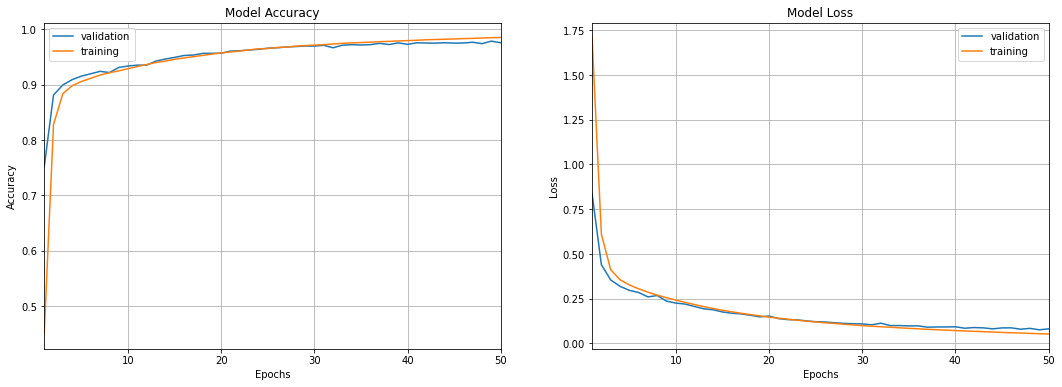

In [23]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show() 

#### Experiment 4

##### Build the MLP Model

In [17]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Set the values for weight initializer and activation function
'''
kernel_initializer = 'random_normal'
activation = 'tanh'
number_of_classes = 10


'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
- Apply Dropout regularization
'''
model = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
# model.add(tf.keras.layers.Dropout(rate=0.1)) # add if needed
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
# model.add(tf.keras.layers.Dropout(rate=0.1)) # add if needed
model.add(tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
                             activation="softmax"))

model.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
CPU times: user 42.6 ms, sys: 40.5 ms, total: 83.2 ms
Wall time: 167 ms


##### Train the MLP Model

In [24]:
%%time

'''
Define the optimizer
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)


'''
Compile the model
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Create the early stopping callback function.
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

'''
Set the epochs and mini batch size
'''
no_of_epochs = 50
size_of_mini_batch = 64


'''
Train the model
'''
history = model.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/50
860/860 [==============================] - 4s 5ms/step - loss: 0.0501 - accuracy: 0.9871 - val_loss: 0.0779 - val_accuracy: 0.9774
Epoch 2/50
860/860 [==============================] - 5s 6ms/step - loss: 0.0484 - accuracy: 0.9867 - val_loss: 0.0823 - val_accuracy: 0.9762
Epoch 3/50
860/860 [==============================] - 4s 5ms/step - loss: 0.0497 - accuracy: 0.9867 - val_loss: 0.0741 - val_accuracy: 0.9790
Epoch 4/50
860/860 [==============================] - 5s 5ms/step - loss: 0.0464 - accuracy: 0.9874 - val_loss: 0.0750 - val_accuracy: 0.9790
Epoch 5/50
860/860 [==============================] - 4s 5ms/step - loss: 0.0453 - accuracy: 0.9876 - val_loss: 0.0751 - val_accuracy: 0.9782
Epoch 6/50
860/860 [==============================] - 4s 5ms/step - loss: 0.0437 - accuracy: 0.9879 - val_loss: 0.0738 - val_accuracy: 0.9780
Epoch 7/50
860/860 [==============================] - 4s 5ms/step - loss: 0.0435 - accuracy: 0.9882 - val_loss: 0.0738 - val_accuracy: 0.9792
Epoch 

##### History object

In [25]:
print("Training Parameters: ", history.params)
print("\nList of Epochs: ", history.epoch)
print("\nEvaluation Metrics: ", history.history.keys())

Training Parameters:  {'verbose': 1, 'epochs': 50, 'steps': 860}

List of Epochs:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]

Evaluation Metrics:  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##### Model evaluation

In [26]:
numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test, y_test, verbose=0))

# model.predict() method returns 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted = model.predict(X_test)
y_test_predicted = np.argmax(y_test_predicted, axis=1) # get the label/index of the highest probability class


y_train_predicted = model.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis=1) # get the label/index of the highest probability class

train_accuracy = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", train_accuracy)

test_accuracy = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", test_accuracy)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

Epochs:  50

Test Data: Loss & Accuracy:  [0.06665831804275513, 0.9800999760627747]

Train Accuracy:  0.9989272727272728

Test Accuracy:  0.9801

Test Confusion Matrix:
[[ 967    0    4    1    1    2    2    1    1    1]
 [   0 1126    1    1    0    1    2    1    2    1]
 [   1    1 1015    3    1    0    0    5    6    0]
 [   2    0    4  994    0    2    0    4    3    1]
 [   1    0    0    1  962    0    6    2    0   10]
 [   3    1    0   12    2  865    3    1    3    2]
 [   5    2    2    1    3    2  942    0    1    0]
 [   2    4    8    2    2    0    0 1001    1    8]
 [   3    0    3    7    4    3    3    4  943    4]
 [   1    2    0    4    8    2    1    4    1  986]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
     

##### Plot Learning Curves

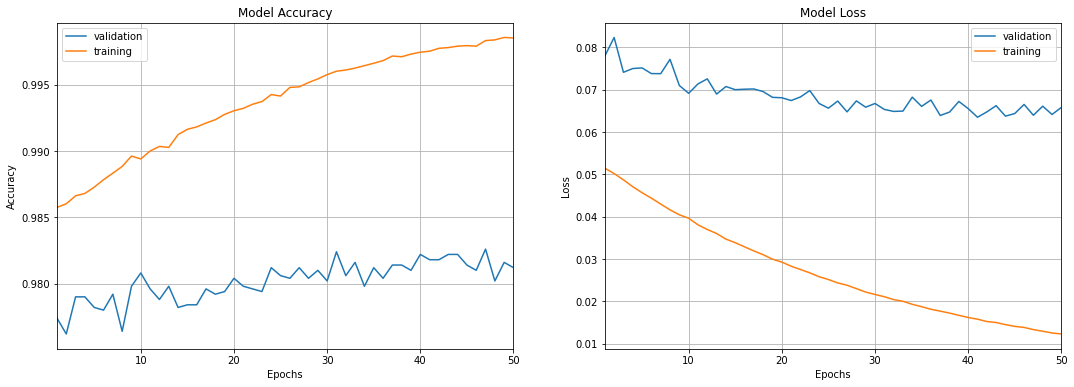

In [27]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show() 

#### Experiment 5

##### Build the MLP Model

In [28]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Set the values for weight initializer and activation function
'''
kernel_initializer = 'random_normal'
activation = 'relu'
number_of_classes = 10


'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
- Apply Dropout regularization
'''
model = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
# model.add(tf.keras.layers.Dropout(rate=0.1)) # add if needed
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
# model.add(tf.keras.layers.Dropout(rate=0.1)) # add if needed
model.add(tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
                             activation="softmax"))

model.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
CPU times: user 60.9 ms, sys: 5.72 ms, total: 66.6 ms
Wall time: 30.3 ms


##### Train the MLP Model

In [29]:
%%time

'''
Define the optimizer
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)


'''
Compile the model
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Create the early stopping callback function.
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

'''
Set the epochs and mini batch size
'''
no_of_epochs = 50
size_of_mini_batch = 64


'''
Train the model
'''
history = model.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/50
860/860 [==============================] - 5s 6ms/step - loss: 0.7941 - accuracy: 0.7732 - val_loss: 0.1954 - val_accuracy: 0.9454
Epoch 2/50
860/860 [==============================] - 4s 5ms/step - loss: 0.1896 - accuracy: 0.9444 - val_loss: 0.1437 - val_accuracy: 0.9600
Epoch 3/50
860/860 [==============================] - 5s 6ms/step - loss: 0.1282 - accuracy: 0.9623 - val_loss: 0.1011 - val_accuracy: 0.9718
Epoch 4/50
860/860 [==============================] - 5s 6ms/step - loss: 0.0911 - accuracy: 0.9731 - val_loss: 0.0891 - val_accuracy: 0.9758
Epoch 5/50
860/860 [==============================] - 5s 6ms/step - loss: 0.0712 - accuracy: 0.9796 - val_loss: 0.0856 - val_accuracy: 0.9756
Epoch 6/50
860/860 [==============================] - 4s 5ms/step - loss: 0.0559 - accuracy: 0.9838 - val_loss: 0.0728 - val_accuracy: 0.9790
Epoch 7/50
860/860 [==============================] - 5s 5ms/step - loss: 0.0462 - accuracy: 0.9869 - val_loss: 0.0741 - val_accuracy: 0.9802
Epoch 

##### History object

In [30]:
print("Training Parameters: ", history.params)
print("\nList of Epochs: ", history.epoch)
print("\nEvaluation Metrics: ", history.history.keys())

Training Parameters:  {'verbose': 1, 'epochs': 50, 'steps': 860}

List of Epochs:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

Evaluation Metrics:  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##### Model evaluation

In [31]:
numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test, y_test, verbose=0))

# model.predict() method returns 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted = model.predict(X_test)
y_test_predicted = np.argmax(y_test_predicted, axis=1) # get the label/index of the highest probability class


y_train_predicted = model.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis=1) # get the label/index of the highest probability class

train_accuracy = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", train_accuracy)

test_accuracy = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", test_accuracy)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

Epochs:  20

Test Data: Loss & Accuracy:  [0.06454778462648392, 0.98089998960495]

Train Accuracy:  0.9999454545454546

Test Accuracy:  0.9809

Test Confusion Matrix:
[[ 968    0    1    0    1    1    2    2    4    1]
 [   0 1126    1    1    0    0    2    1    4    0]
 [   4    2 1006    2    4    0    2    6    6    0]
 [   0    0    3  996    0    2    0    2    3    4]
 [   1    0    4    0  967    0    2    1    0    7]
 [   2    0    0    9    1  867    5    1    5    2]
 [   4    2    1    1    4    2  942    0    2    0]
 [   2    4    6    3    1    0    0 1002    5    5]
 [   4    0    3    4    0    1    4    2  954    2]
 [   2    2    0    6    6    3    1    4    4  981]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
       

##### Plot Learning Curves

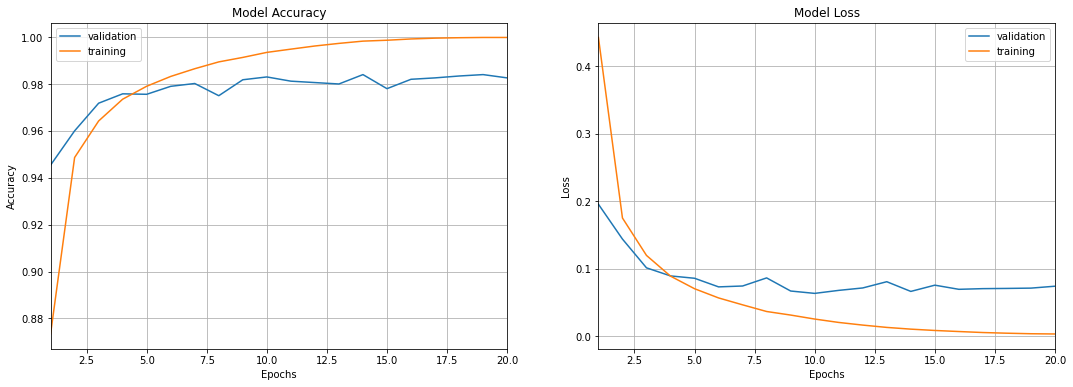

In [32]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show() 

#### Experiment 6

##### Build the MLP Model

In [33]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Set the values for weight initializer and activation function
'''
kernel_initializer = 'random_normal'
activation = 'relu'
number_of_classes = 10


'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
- Apply Dropout regularization
'''
model = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.1)) # add if needed
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.1)) # add if needed
model.add(tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
                             activation="softmax"))

model.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
___________________________________

##### Train the MLP Model

In [34]:
%%time

'''
Define the optimizer
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)


'''
Compile the model
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Create the early stopping callback function.
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

'''
Set the epochs and mini batch size
'''
no_of_epochs = 50
size_of_mini_batch = 64


'''
Train the model
'''
history = model.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/50
860/860 [==============================] - 6s 6ms/step - loss: 0.8369 - accuracy: 0.7511 - val_loss: 0.1950 - val_accuracy: 0.9454
Epoch 2/50
860/860 [==============================] - 4s 5ms/step - loss: 0.2102 - accuracy: 0.9366 - val_loss: 0.1423 - val_accuracy: 0.9582
Epoch 3/50
860/860 [==============================] - 4s 5ms/step - loss: 0.1492 - accuracy: 0.9550 - val_loss: 0.1001 - val_accuracy: 0.9698
Epoch 4/50
860/860 [==============================] - 5s 6ms/step - loss: 0.1113 - accuracy: 0.9679 - val_loss: 0.0911 - val_accuracy: 0.9734
Epoch 5/50
860/860 [==============================] - 5s 5ms/step - loss: 0.0892 - accuracy: 0.9728 - val_loss: 0.0927 - val_accuracy: 0.9698
Epoch 6/50
860/860 [==============================] - 5s 5ms/step - loss: 0.0755 - accuracy: 0.9771 - val_loss: 0.0743 - val_accuracy: 0.9786
Epoch 7/50
860/860 [==============================] - 5s 5ms/step - loss: 0.0649 - accuracy: 0.9802 - val_loss: 0.0741 - val_accuracy: 0.9784
Epoch 

##### History object

In [35]:
print("Training Parameters: ", history.params)
print("\nList of Epochs: ", history.epoch)
print("\nEvaluation Metrics: ", history.history.keys())

Training Parameters:  {'verbose': 1, 'epochs': 50, 'steps': 860}

List of Epochs:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

Evaluation Metrics:  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##### Model evaluation

In [36]:
numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test, y_test, verbose=0))

# model.predict() method returns 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted = model.predict(X_test)
y_test_predicted = np.argmax(y_test_predicted, axis=1) # get the label/index of the highest probability class


y_train_predicted = model.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis=1) # get the label/index of the highest probability class

train_accuracy = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", train_accuracy)

test_accuracy = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", test_accuracy)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

Epochs:  23

Test Data: Loss & Accuracy:  [0.062048908323049545, 0.9817000031471252]

Train Accuracy:  0.9990363636363636

Test Accuracy:  0.9817

Test Confusion Matrix:
[[ 971    0    1    0    0    1    4    0    2    1]
 [   0 1126    2    1    0    0    3    1    2    0]
 [   5    2 1010    3    3    0    1    3    4    1]
 [   0    0    4  993    0    3    0    1    2    7]
 [   1    0    3    0  963    0    4    0    0   11]
 [   2    0    0    5    1  877    4    1    1    1]
 [   5    3    0    1    2    2  945    0    0    0]
 [   2    6    7    3    1    0    0  999    5    5]
 [   6    0    4    2    2    2    5    2  948    3]
 [   2    2    0    4    7    2    2    3    2  985]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
    

##### Plot Learning Curves

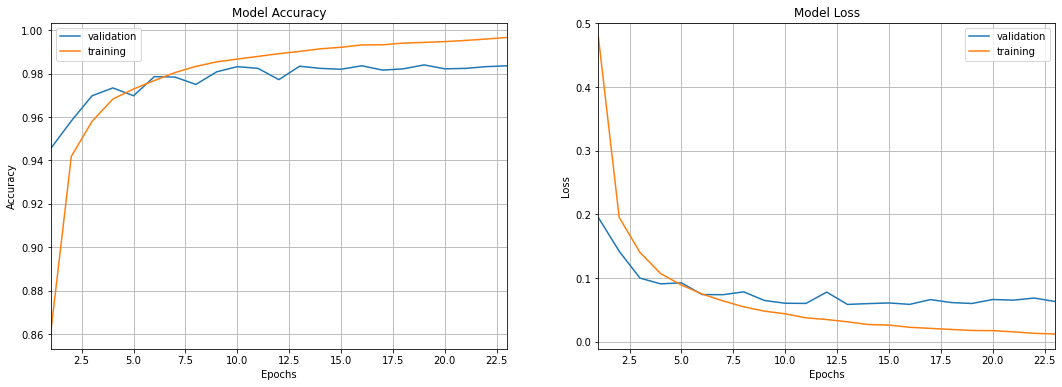

In [37]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show() 

#### Experiment 7

##### Build the MLP Model

In [38]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Set the values for weight initializer and activation function
'''
kernel_initializer = 'random_normal'
activation = 'relu'
number_of_classes = 10


'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
- Apply Dropout regularization
'''
model = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.5)) # add if needed
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.1)) # add if needed
model.add(tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
                             activation="softmax"))

model.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
___________________________________

##### Train the MLP Model

In [39]:
%%time

'''
Define the optimizer
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)


'''
Compile the model
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Create the early stopping callback function.
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

'''
Set the epochs and mini batch size
'''
no_of_epochs = 50
size_of_mini_batch = 64


'''
Train the model
'''
history = model.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/50
860/860 [==============================] - 5s 6ms/step - loss: 0.9443 - accuracy: 0.7029 - val_loss: 0.2043 - val_accuracy: 0.9406
Epoch 2/50
860/860 [==============================] - 7s 8ms/step - loss: 0.2703 - accuracy: 0.9167 - val_loss: 0.1465 - val_accuracy: 0.9594
Epoch 3/50
860/860 [==============================] - 5s 6ms/step - loss: 0.2020 - accuracy: 0.9400 - val_loss: 0.1130 - val_accuracy: 0.9668
Epoch 4/50
860/860 [==============================] - 5s 6ms/step - loss: 0.1643 - accuracy: 0.9505 - val_loss: 0.0999 - val_accuracy: 0.9720
Epoch 5/50
860/860 [==============================] - 5s 6ms/step - loss: 0.1442 - accuracy: 0.9551 - val_loss: 0.0920 - val_accuracy: 0.9738
Epoch 6/50
860/860 [==============================] - 6s 7ms/step - loss: 0.1295 - accuracy: 0.9594 - val_loss: 0.0850 - val_accuracy: 0.9760
Epoch 7/50
860/860 [==============================] - 6s 7ms/step - loss: 0.1163 - accuracy: 0.9643 - val_loss: 0.0803 - val_accuracy: 0.9768
Epoch 

##### History object

In [40]:
print("Training Parameters: ", history.params)
print("\nList of Epochs: ", history.epoch)
print("\nEvaluation Metrics: ", history.history.keys())

Training Parameters:  {'verbose': 1, 'epochs': 50, 'steps': 860}

List of Epochs:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]

Evaluation Metrics:  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##### Model evaluation

In [41]:
numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test, y_test, verbose=0))

# model.predict() method returns 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted = model.predict(X_test)
y_test_predicted = np.argmax(y_test_predicted, axis=1) # get the label/index of the highest probability class


y_train_predicted = model.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis=1) # get the label/index of the highest probability class

train_accuracy = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", train_accuracy)

test_accuracy = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", test_accuracy)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

Epochs:  50

Test Data: Loss & Accuracy:  [0.06274193525314331, 0.9824000000953674]

Train Accuracy:  0.9991272727272728

Test Accuracy:  0.9824

Test Confusion Matrix:
[[ 970    1    2    1    0    1    2    1    1    1]
 [   0 1128    1    1    0    1    2    1    1    0]
 [   0    1 1016    3    1    0    1    7    3    0]
 [   0    0    3  999    0    1    0    5    1    1]
 [   1    0    0    0  966    0    6    3    1    5]
 [   2    0    0   10    1  871    2    1    3    2]
 [   6    2    0    1    2    3  943    0    1    0]
 [   1    4    7    2    0    0    0 1010    0    4]
 [   4    1    3   11    6    4    1    3  938    3]
 [   2    3    0    4   10    1    1    5    0  983]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
     

##### Plot Learning Curves

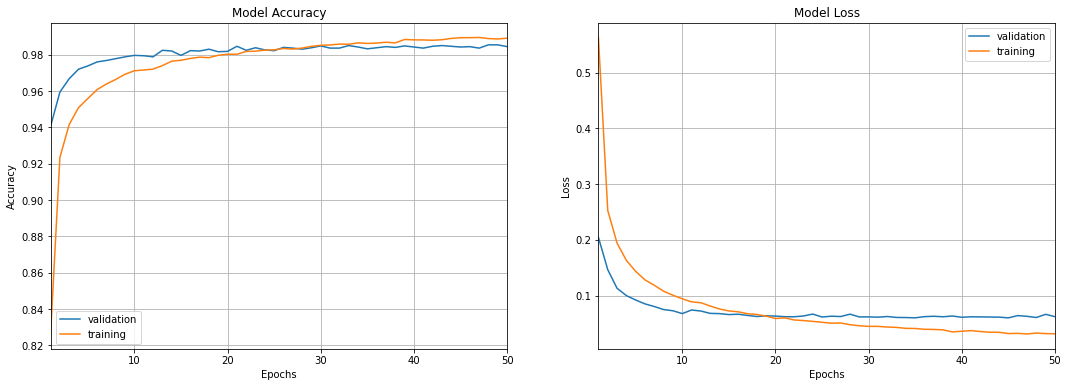

In [42]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show() 

#### Experiment 8

##### Build the MLP Model

In [43]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Set the values for weight initializer and activation function
'''
kernel_initializer = 'random_normal'
activation = 'relu'
number_of_classes = 10


'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
- Apply Dropout regularization
'''
model = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.5)) # add if needed
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.1)) # add if needed
model.add(tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
                             activation="softmax"))

model.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
___________________________________

##### Train the MLP Model

In [44]:
%%time

'''
Define the optimizer
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)


'''
Compile the model
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Create the early stopping callback function.
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

'''
Set the epochs and mini batch size
'''
no_of_epochs = 50
size_of_mini_batch = 64


'''
Train the model
'''
history = model.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/50
860/860 [==============================] - 5s 6ms/step - loss: 0.6663 - accuracy: 0.7825 - val_loss: 0.1370 - val_accuracy: 0.9600
Epoch 2/50
860/860 [==============================] - 5s 5ms/step - loss: 0.2145 - accuracy: 0.9350 - val_loss: 0.1141 - val_accuracy: 0.9668
Epoch 3/50
860/860 [==============================] - 5s 6ms/step - loss: 0.1770 - accuracy: 0.9455 - val_loss: 0.0890 - val_accuracy: 0.9724
Epoch 4/50
860/860 [==============================] - 5s 5ms/step - loss: 0.1452 - accuracy: 0.9556 - val_loss: 0.1063 - val_accuracy: 0.9682
Epoch 5/50
860/860 [==============================] - 5s 5ms/step - loss: 0.1299 - accuracy: 0.9594 - val_loss: 0.0836 - val_accuracy: 0.9736
Epoch 6/50
860/860 [==============================] - 5s 5ms/step - loss: 0.1255 - accuracy: 0.9603 - val_loss: 0.0830 - val_accuracy: 0.9760
Epoch 7/50
860/860 [==============================] - 5s 6ms/step - loss: 0.1176 - accuracy: 0.9633 - val_loss: 0.0816 - val_accuracy: 0.9770
Epoch 

##### History object

In [45]:
print("Training Parameters: ", history.params)
print("\nList of Epochs: ", history.epoch)
print("\nEvaluation Metrics: ", history.history.keys())

Training Parameters:  {'verbose': 1, 'epochs': 50, 'steps': 860}

List of Epochs:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]

Evaluation Metrics:  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##### Model evaluation

In [46]:
numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test, y_test, verbose=0))

# model.predict() method returns 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted = model.predict(X_test)
y_test_predicted = np.argmax(y_test_predicted, axis=1) # get the label/index of the highest probability class


y_train_predicted = model.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis=1) # get the label/index of the highest probability class

train_accuracy = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", train_accuracy)

test_accuracy = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", test_accuracy)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

Epochs:  43

Test Data: Loss & Accuracy:  [0.07149183005094528, 0.9818000197410583]

Train Accuracy:  0.9975454545454545

Test Accuracy:  0.9818

Test Confusion Matrix:
[[ 971    1    0    1    0    1    4    1    0    1]
 [   0 1126    0    2    0    1    2    1    3    0]
 [   4    0 1010    3    2    0    3    7    3    0]
 [   0    0    4  996    0    2    0    2    2    4]
 [   0    0    1    1  959    0    8    1    1   11]
 [   2    0    0   10    0  872    5    1    2    0]
 [   4    2    0    1    2    3  946    0    0    0]
 [   0    4   10    1    0    0    0 1009    3    1]
 [   5    1    1    5    3    2    1    3  952    1]
 [   1    2    0    9    7    2    1    4    6  977]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
     

##### Plot Learning Curves

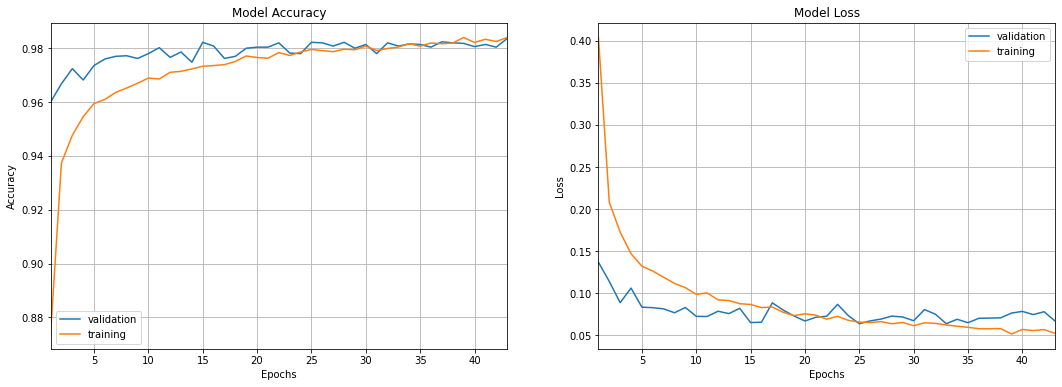

In [47]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show() 

#### Experiment 9

##### Build the MLP Model

In [53]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Set the values for weight initializer and activation function
'''
kernel_initializer = 'random_normal'
activation = 'relu'
number_of_classes = 10


'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
- Apply Dropout regularization
'''
model = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
# hidden layers
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))

# output layer
model.add(tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
                             activation="softmax"))

model.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100) 

##### Train the MLP Model

In [54]:
%%time

'''
Define the optimizer
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)


'''
Compile the model
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Create the early stopping callback function.
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

'''
Set the epochs and mini batch size
'''
no_of_epochs = 50
size_of_mini_batch = 64


'''
Train the model
'''
history = model.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/50
860/860 [==============================] - 5s 6ms/step - loss: 2.3018 - accuracy: 0.1115 - val_loss: 2.3013 - val_accuracy: 0.1126
Epoch 2/50
860/860 [==============================] - 6s 7ms/step - loss: 2.3011 - accuracy: 0.1158 - val_loss: 2.3006 - val_accuracy: 0.1126
Epoch 3/50
860/860 [==============================] - 6s 7ms/step - loss: 2.3011 - accuracy: 0.1157 - val_loss: 2.3011 - val_accuracy: 0.1126
Epoch 4/50
860/860 [==============================] - 4s 5ms/step - loss: 2.3014 - accuracy: 0.1133 - val_loss: 2.3012 - val_accuracy: 0.1126
Epoch 5/50
860/860 [==============================] - 5s 5ms/step - loss: 2.3015 - accuracy: 0.1134 - val_loss: 2.3023 - val_accuracy: 0.1126
Epoch 6/50
860/860 [==============================] - 4s 5ms/step - loss: 2.3016 - accuracy: 0.1135 - val_loss: 2.3013 - val_accuracy: 0.1126
Epoch 7/50
860/860 [==============================] - 5s 6ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3012 - val_accuracy: 0.1126
Epoch 

##### History object

In [55]:
print("Training Parameters: ", history.params)
print("\nList of Epochs: ", history.epoch)
print("\nEvaluation Metrics: ", history.history.keys())

Training Parameters:  {'verbose': 1, 'epochs': 50, 'steps': 860}

List of Epochs:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Evaluation Metrics:  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##### Model evaluation

In [56]:
numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test, y_test, verbose=0))

# model.predict() method returns 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted = model.predict(X_test)
y_test_predicted = np.argmax(y_test_predicted, axis=1) # get the label/index of the highest probability class


y_train_predicted = model.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis=1) # get the label/index of the highest probability class

train_accuracy = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", train_accuracy)

test_accuracy = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", test_accuracy)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

Epochs:  12

Test Data: Loss & Accuracy:  [2.3011956214904785, 0.11349999904632568]

Train Accuracy:  0.11234545454545454

Test Accuracy:  0.1135

Test Confusion Matrix:
[[   0  980    0    0    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0 1032    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0]
 [   0  982    0    0    0    0    0    0    0    0]
 [   0  892    0    0    0    0    0    0    0    0]
 [   0  958    0    0    0    0    0    0    0    0]
 [   0 1028    0    0    0    0    0    0    0    0]
 [   0  974    0    0    0    0    0    0    0    0]
 [   0 1009    0    0    0    0    0    0    0    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
    

/opt/homebrew/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Plot Learning Curves

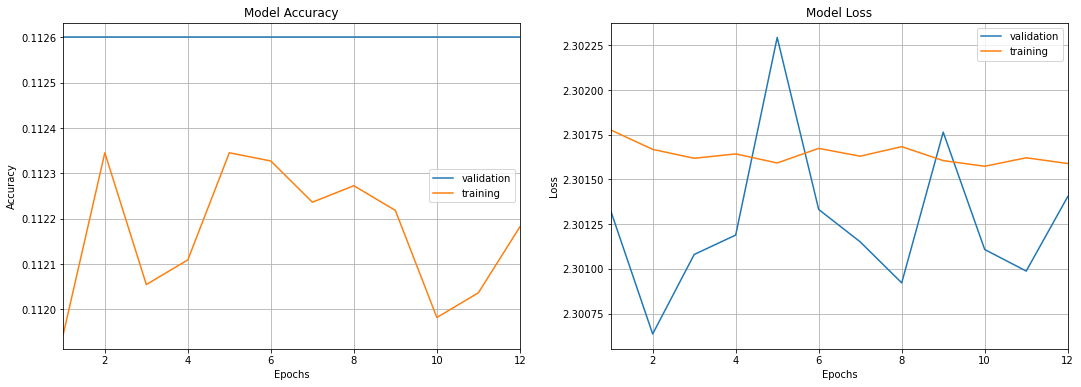

In [52]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show() 

#### Experiment 10

##### Build the MLP Model

In [57]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Set the values for weight initializer and activation function
'''
kernel_initializer = 'random_normal'
activation = 'relu'
number_of_classes = 10


'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
- Apply Dropout regularization
'''
model = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
# hidden layers
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation, 
                             bias_initializer="zeros"))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation,
                            bias_initializer="zeros"))
# output layer
model.add(tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
                             activation="softmax"))

model.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100) 

##### Train the MLP Model

In [58]:
%%time

'''
Define the optimizer
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)


'''
Compile the model
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Create the early stopping callback function.
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

'''
Set the epochs and mini batch size
'''
no_of_epochs = 50
size_of_mini_batch = 64


'''
Train the model
'''
history = model.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/50
860/860 [==============================] - 9s 10ms/step - loss: 2.3018 - accuracy: 0.1109 - val_loss: 2.3013 - val_accuracy: 0.1126
Epoch 2/50
860/860 [==============================] - 9s 11ms/step - loss: 2.3011 - accuracy: 0.1158 - val_loss: 2.3006 - val_accuracy: 0.1126
Epoch 3/50
860/860 [==============================] - 8s 9ms/step - loss: 2.3011 - accuracy: 0.1157 - val_loss: 2.3011 - val_accuracy: 0.1126
Epoch 4/50
860/860 [==============================] - 9s 10ms/step - loss: 2.3014 - accuracy: 0.1133 - val_loss: 2.3012 - val_accuracy: 0.1126
Epoch 5/50
860/860 [==============================] - 7s 8ms/step - loss: 2.3015 - accuracy: 0.1134 - val_loss: 2.3023 - val_accuracy: 0.1126
Epoch 6/50
860/860 [==============================] - 7s 8ms/step - loss: 2.3016 - accuracy: 0.1135 - val_loss: 2.3013 - val_accuracy: 0.1126
Epoch 7/50
860/860 [==============================] - 7s 9ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3011 - val_accuracy: 0.1126
Epo

##### History object

In [59]:
print("Training Parameters: ", history.params)
print("\nList of Epochs: ", history.epoch)
print("\nEvaluation Metrics: ", history.history.keys())

Training Parameters:  {'verbose': 1, 'epochs': 50, 'steps': 860}

List of Epochs:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Evaluation Metrics:  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##### Model evaluation

In [60]:
numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test, y_test, verbose=0))

# model.predict() method returns 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted = model.predict(X_test)
y_test_predicted = np.argmax(y_test_predicted, axis=1) # get the label/index of the highest probability class


y_train_predicted = model.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis=1) # get the label/index of the highest probability class

train_accuracy = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", train_accuracy)

test_accuracy = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", test_accuracy)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

Epochs:  12

Test Data: Loss & Accuracy:  [2.30120849609375, 0.11349999904632568]

Train Accuracy:  0.11234545454545454

Test Accuracy:  0.1135

Test Confusion Matrix:
[[   0  980    0    0    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0 1032    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0]
 [   0  982    0    0    0    0    0    0    0    0]
 [   0  892    0    0    0    0    0    0    0    0]
 [   0  958    0    0    0    0    0    0    0    0]
 [   0 1028    0    0    0    0    0    0    0    0]
 [   0  974    0    0    0    0    0    0    0    0]
 [   0 1009    0    0    0    0    0    0    0    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
      

/opt/homebrew/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Plot Learning Curves

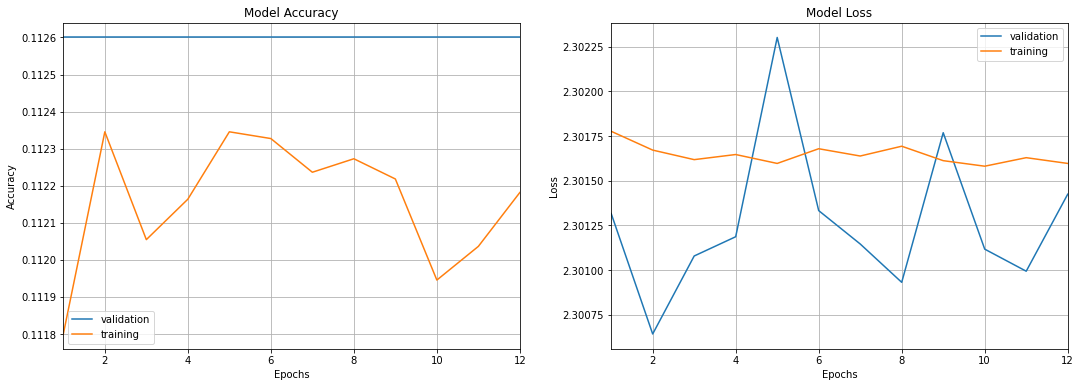

In [61]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show() 